# 1. Introduction to ACS module

Before you begin, make sure yuo have the private key for the census data API.

In [1]:
# import sys
# import os
# Save the acs.py file in the same directory where this Rmd or ipynb file is being run.
# The following lines will add the current directory into the path
# so that it can search the py file in the directory when we try to import
# wd = os.getcwd()
# sys.path.append(wd)
import numpy as np
import pandas as pd
# acs will also import pandas, numpy, re, and requests modules
import MarkeyDataTools as mdt

# this reload function is just to reload the MarkeyDataTools module as I periodically edit and test the module.
# from importlib import reload

## Introduction

As a test, I am creating a module that call up a dataset; and as an example I will show you how the functions in the acs.py can work out to execute the same tasks that were done in `acs_computer_broadband` in the Data/ACS folder.

There were five tables imported separately, but using acs, you can import the variables in one table.   
To do so, you need to set values for the following variables:   
* year
* tablename (in a list)
   - For example, if you want to lookup "B28005"(all_ind), "B28009A"(white), "B28009H"(white_nh), "B28009B"(black), "B28009I"(hisp), set the value for source as \["B28005", "B28009A", "B28009H", "B28009B", "B28009I" \]
* source (the subgroup of acs datagroup)
   - In this example, it will be acs1 as ``acs1`` is the annual data.
   - Many counties are missing in the acs1 as this is annual; you can find others in the ``acs5``, which is conducted every 5 years.
* state: the default value is 'KY', so you don't need to worry about it.

In [2]:
year = 2019
table =  ["B28005", "B28009A", "B28009H", "B28009B", "B28009I" ]
source = 'acs5'

## Part I. importing the module and calling the acs class

Above, we alreay imported the MarkeyDataTool module by executing `import MarkeyDataTool as mdt`. Now, let's call the `acs` class   
To call the `acs` class, you need year, table and source at the very least.   
You can also set the region arguement, whose default level is "**county**".   
**Please note that when you first run the acs class, it will ask for your private key**

In [3]:
acs = mdt.acs(year = year, table = table, source = 'acs5')

insert your private key for the census data : ba1c94e9a1b43440cf3ef2bf0b7803ddc39bcf2d


As another example, let's call the acs class with the region argument **"tract"**

In [4]:
acs_tract = mdt.acs(year = year, table = table, source = 'acs5', region = 'tract')

insert your private key for the census data : ba1c94e9a1b43440cf3ef2bf0b7803ddc39bcf2d


When you just do this, the most important attribute you might want to take a look at is the variable table.   
The name of the attribute is `variable_table`. This contains every variables name in the entire acs5 data.   
Obviously, the table names are contained in the variable table, but they have extensions such as 001_E, 002_E, etc.   

In [5]:
acs.variable_table.head()

,name,label,concept
0,for,Census API FIPS 'for' clause,Census API Geography Specification
1,in,Census API FIPS 'in' clause,Census API Geography Specification
2,ucgid,Uniform Census Geography Identifier clause,Census API Geography Specification
3,B24022_060E,Estimate!!Total:!!Female:!!Service occupations:!!Food preparation and serving related occupations,"SEX BY OCCUPATION AND MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS) FOR THE FULL-TIME, YEAR-ROUND CIVILIAN EMPLOYED POPULATION 16 YEARS AND OVER"
4,B19001B_014E,"Estimate!!Total:!!$100,000 to $124,999",HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS) (BLACK OR AFRICAN AMERICAN ALONE HOUSEHOLDER)


You don't need to check `acs_tract.variable_table` because you will get the same table as long as having the same value for the **source** argument

### Part II. Pulling the acs date

Using the attribute function, **`gen_dataframe()`**, you will get the data you wanted.     
This will be stored in the object `acs`, so you can use other functions to tidy and wrangle data for your needs.

In [6]:
acs.gen_dataframe().head()

,FIPS,County,State,B28005_012E,B28005_011E,B28005_010E,B28005_016E,B28005_015E,B28005_014E,B28005_013E,...,B28009B_005E,B28009B_001E,B28009B_002E,B28009B_006E,B28009I_002E,B28009I_001E,B28009I_004E,B28009I_003E,B28009I_006E,B28009I_005E
0,21079,Garrard County,Kentucky,724,8931,149,16,2191,3021,577,...,87,321,255,66,222,387,118,0,165,104
1,21037,Campbell County,Kentucky,4114,49138,823,123,10573,13480,2137,...,653,2416,2243,173,1776,1866,1468,0,90,308
2,21063,Elliott County,Kentucky,130,2734,0,0,730,1330,396,...,0,0,0,0,6,23,6,0,17,0
3,21123,Larue County,Kentucky,1225,6658,13,4,1623,2309,538,...,0,478,350,128,351,449,74,0,98,277
4,21167,Mercer County,Kentucky,998,10650,0,13,2680,3864,1154,...,51,905,583,322,636,636,619,0,0,17


As you see, you have the county names and their FIPS numbers in the first columns.   
Now, let's see how it looks like when the geographical level is at **'tract'**

In [7]:
acs_tract.gen_dataframe().head()

,FIPS,Tract,County,State,B28005_012E,B28005_011E,B28005_010E,B28005_016E,B28005_015E,B28005_014E,...,B28009B_005E,B28009B_001E,B28009B_002E,B28009B_006E,B28009I_002E,B28009I_001E,B28009I_004E,B28009I_003E,B28009I_006E,B28009I_005E
0,21005950201,Census Tract 9502.01,Anderson County,Kentucky,459,2583,0,0,584,896,...,0,356,312,44,0,0,0,0,0,0
1,21005950202,Census Tract 9502.02,Anderson County,Kentucky,187,2052,0,15,379,572,...,0,0,0,0,149,149,80,0,0,69
2,21013961100,Census Tract 9611,Bell County,Kentucky,83,1430,0,0,212,446,...,0,0,0,0,0,0,0,0,0,0
3,21015070311,Census Tract 703.11,Boone County,Kentucky,17,1464,7,15,323,452,...,0,165,165,0,35,35,35,0,0,0
4,21015070312,Census Tract 703.12,Boone County,Kentucky,118,1733,0,16,296,598,...,187,240,240,0,92,92,92,0,0,0


## Part III. Searching the tables and variables

To search a varialbe by keyword, you can use `search` attribute. If you have already used the function `gen_dataframe`, you do not need additional arguments. If you did not, you would need to give an integer for the year value.   
Also, if you want to save the search result as a file, then the argument for `savefile`, whose default value is *False*, should now be *`True`* and you should give a `filename`. If you forgot the filename, don't worry, it will ask you once again. Please **note** that the file format should be **`csv`**. As a test, please type in **`'test.csv'`**.

In [8]:
acs.search('poverty,health')
# acs.search('poverty,heath', savefile = True)

,index,name,description,source
0,0,B17015,POVERTY STATUS IN THE PAST 12 MONTHS OF FAMILIES BY FAMILY TYPE BY SOCIAL SECURITY INCOME BY SUPPLEMENTAL SECURITY INCOME (SSI) AND CASH PUBLIC ASSISTANCE INCOME,acs5
1,2,B17016,POVERTY STATUS IN THE PAST 12 MONTHS OF FAMILIES BY FAMILY TYPE BY WORK EXPERIENCE OF HOUSEHOLDER AND SPOUSE,acs5
2,4,B17017,POVERTY STATUS IN THE PAST 12 MONTHS BY HOUSEHOLD TYPE BY AGE OF HOUSEHOLDER,acs5
3,6,B17018,POVERTY STATUS IN THE PAST 12 MONTHS OF FAMILIES BY HOUSEHOLD TYPE BY EDUCATIONAL ATTAINMENT OF HOUSEHOLDER,acs5
4,11,B17012,POVERTY STATUS IN THE PAST 12 MONTHS OF FAMILIES BY HOUSEHOLD TYPE BY NUMBER OF RELATED CHILDREN UNDER 18 YEARS,acs5
...,...,...,...,...
105,1058,B22003,RECEIPT OF FOOD STAMPS/SNAP IN THE PAST 12 MONTHS BY POVERTY STATUS IN THE PAST 12 MONTHS FOR HOUSEHOLDS,acs5
106,1066,B17020H,"POVERTY STATUS IN THE PAST 12 MONTHS BY AGE (WHITE ALONE, NOT HISPANIC OR LATINO)",acs5
107,1067,B17020I,POVERTY STATUS IN THE PAST 12 MONTHS BY AGE (HISPANIC OR LATINO),acs5
108,1069,B17020F,POVERTY STATUS IN THE PAST 12 MONTHS BY AGE (SOME OTHER RACE ALONE),acs5


In the example above, comma (`,`) indicates **OR** operator. Therefore, you are searching the cases where description contains words proverty or health. I might improve the serach engine by including various seach opearators like **AND**, but for now, **OR** is the only option. However, if you know `regex`, you can also use the `search` function with the regex. Below is the example.

In [9]:
import re
pattern = re.compile('(?=health insurance)(?=.*sex)(?=.*age)', flags = re.I)
acs.search(pattern)

,index,name,description,source
0,106,B27022,HEALTH INSURANCE COVERAGE STATUS BY SEX BY ENROLLMENT STATUS FOR YOUNG ADULTS AGED 19 TO 25,acs5
1,335,B27001,HEALTH INSURANCE COVERAGE STATUS BY SEX BY AGE,acs5


In this example, I searched cases where description contains words `health insurance`, `sex`, and `age`. **`flags = re.I`** lets this search engine to ignore the case of the letters. For more information on regex and its operations, please visit [regex tutorial](https://www.w3schools.com/python/python_regex.asp)

Now, let's say you think you want to explore more about the group `'B27022'`. You can use the attribute function **`gen_group_varible_desc`** with the `group` argument (it is an abbreviation of generate group's variable description). The `group` argument can have one group in a string format or it can also be a list or numpy array that contains a number of it. Let's see what we get for `'B27022'`

In [10]:
acs.gen_group_variable_desc('B27022')

,name,label,concept
9906,B27022_001E,Estimate!!Total:,HEALTH INSURANCE COVERAGE STATUS BY SEX BY ENROLLMENT STATUS FOR YOUNG ADULTS AGED 19 TO 25
9891,B27022_002E,Estimate!!Total:!!Male:,HEALTH INSURANCE COVERAGE STATUS BY SEX BY ENROLLMENT STATUS FOR YOUNG ADULTS AGED 19 TO 25
9895,B27022_003E,Estimate!!Total:!!Male:!!Enrolled in school:,HEALTH INSURANCE COVERAGE STATUS BY SEX BY ENROLLMENT STATUS FOR YOUNG ADULTS AGED 19 TO 25
9827,B27022_004E,Estimate!!Total:!!Male:!!Enrolled in school:!!With health insurance coverage,HEALTH INSURANCE COVERAGE STATUS BY SEX BY ENROLLMENT STATUS FOR YOUNG ADULTS AGED 19 TO 25
9828,B27022_005E,Estimate!!Total:!!Male:!!Enrolled in school:!!No health insurance coverage,HEALTH INSURANCE COVERAGE STATUS BY SEX BY ENROLLMENT STATUS FOR YOUNG ADULTS AGED 19 TO 25
9824,B27022_006E,Estimate!!Total:!!Male:!!Not enrolled in school:,HEALTH INSURANCE COVERAGE STATUS BY SEX BY ENROLLMENT STATUS FOR YOUNG ADULTS AGED 19 TO 25
9825,B27022_007E,Estimate!!Total:!!Male:!!Not enrolled in school:!!With health insurance coverage,HEALTH INSURANCE COVERAGE STATUS BY SEX BY ENROLLMENT STATUS FOR YOUNG ADULTS AGED 19 TO 25
9822,B27022_008E,Estimate!!Total:!!Male:!!Not enrolled in school:!!No health insurance coverage,HEALTH INSURANCE COVERAGE STATUS BY SEX BY ENROLLMENT STATUS FOR YOUNG ADULTS AGED 19 TO 25
9823,B27022_009E,Estimate!!Total:!!Female:,HEALTH INSURANCE COVERAGE STATUS BY SEX BY ENROLLMENT STATUS FOR YOUNG ADULTS AGED 19 TO 25
9835,B27022_010E,Estimate!!Total:!!Female:!!Enrolled in school:,HEALTH INSURANCE COVERAGE STATUS BY SEX BY ENROLLMENT STATUS FOR YOUNG ADULTS AGED 19 TO 25


What if I want to see the description of the variables in the groups `"B28005" and "B28009A"` together? The group argument would be \['B28005', 'B28009A' \]

In [11]:
acs.gen_group_variable_desc(['B28005','B28009A'])

,name,label,concept
2468,B28005_001E,Estimate!!Total:,AGE BY PRESENCE OF A COMPUTER AND TYPES OF INTERNET SUBSCRIPTION IN HOUSEHOLD
2461,B28005_002E,Estimate!!Total:!!Under 18 years:,AGE BY PRESENCE OF A COMPUTER AND TYPES OF INTERNET SUBSCRIPTION IN HOUSEHOLD
2457,B28005_003E,Estimate!!Total:!!Under 18 years:!!Has a computer:,AGE BY PRESENCE OF A COMPUTER AND TYPES OF INTERNET SUBSCRIPTION IN HOUSEHOLD
2452,B28005_004E,Estimate!!Total:!!Under 18 years:!!Has a computer:!!With dial-up Internet subscription alone,AGE BY PRESENCE OF A COMPUTER AND TYPES OF INTERNET SUBSCRIPTION IN HOUSEHOLD
2486,B28005_005E,Estimate!!Total:!!Under 18 years:!!Has a computer:!!With a broadband Internet subscription,AGE BY PRESENCE OF A COMPUTER AND TYPES OF INTERNET SUBSCRIPTION IN HOUSEHOLD
2483,B28005_006E,Estimate!!Total:!!Under 18 years:!!Has a computer:!!Without an Internet subscription,AGE BY PRESENCE OF A COMPUTER AND TYPES OF INTERNET SUBSCRIPTION IN HOUSEHOLD
2477,B28005_007E,Estimate!!Total:!!Under 18 years:!!No computer,AGE BY PRESENCE OF A COMPUTER AND TYPES OF INTERNET SUBSCRIPTION IN HOUSEHOLD
2479,B28005_008E,Estimate!!Total:!!18 to 64 years:,AGE BY PRESENCE OF A COMPUTER AND TYPES OF INTERNET SUBSCRIPTION IN HOUSEHOLD
2475,B28005_009E,Estimate!!Total:!!18 to 64 years:!!Has a computer:,AGE BY PRESENCE OF A COMPUTER AND TYPES OF INTERNET SUBSCRIPTION IN HOUSEHOLD
2298,B28005_010E,Estimate!!Total:!!18 to 64 years:!!Has a computer:!!With dial-up Internet subscription alone,AGE BY PRESENCE OF A COMPUTER AND TYPES OF INTERNET SUBSCRIPTION IN HOUSEHOLD


Lastly, the latest search result is stored as attribute `'group_variable_desc'`

In [12]:
acs.group_variable_desc.head()

,name,label,concept
2468,B28005_001E,Estimate!!Total:,AGE BY PRESENCE OF A COMPUTER AND TYPES OF INTERNET SUBSCRIPTION IN HOUSEHOLD
2461,B28005_002E,Estimate!!Total:!!Under 18 years:,AGE BY PRESENCE OF A COMPUTER AND TYPES OF INTERNET SUBSCRIPTION IN HOUSEHOLD
2457,B28005_003E,Estimate!!Total:!!Under 18 years:!!Has a computer:,AGE BY PRESENCE OF A COMPUTER AND TYPES OF INTERNET SUBSCRIPTION IN HOUSEHOLD
2452,B28005_004E,Estimate!!Total:!!Under 18 years:!!Has a computer:!!With dial-up Internet subscription alone,AGE BY PRESENCE OF A COMPUTER AND TYPES OF INTERNET SUBSCRIPTION IN HOUSEHOLD
2486,B28005_005E,Estimate!!Total:!!Under 18 years:!!Has a computer:!!With a broadband Internet subscription,AGE BY PRESENCE OF A COMPUTER AND TYPES OF INTERNET SUBSCRIPTION IN HOUSEHOLD


## Part IV. Renaming and aggregating variables

You might want to rename the group **`B28005`** with the name **`computer_internet`** as variables in the group indicate estimates of the population having a computer or an internet subscription by age group. In addition, since **`B28009A`** is technically the same group for the white population alone, so it would be appropriate to rename the group as **`computer_internet_white`**.   
To do so, you use the **`rename_group`** attribute function and the **`sub`** argument in the function requires a dictionary in the following format:   
* { 'new name1' : 'original group name1', 'new name2': 'original group name2'}


Hence, in our example, the sub argument would be {'computer_internet' : 'B28005', 'computer_internet_white': 'B28009A'}. Obviously, you may not need to rename them as long as you are comfortable with the original group name. Don't worry about the case of the letters.

**If you want to permanently replace the group names, set the inplace argument, whose default value is *`False`*, as *`True`*.**

Because we have to discuss `aggregate` attribute function after this, we will not touch the inplace argment. 

In [13]:
sub_dict = {'computer_internet' : 'B28005', 'computer_internet_white': 'b28009A'}

In [14]:
acs.rename_group(sub_dict)

,FIPS,County,State,computer_internet_012E,computer_internet_011E,computer_internet_010E,computer_internet_016E,computer_internet_015E,computer_internet_014E,computer_internet_013E,...,B28009B_005E,B28009B_001E,B28009B_002E,B28009B_006E,B28009I_002E,B28009I_001E,B28009I_004E,B28009I_003E,B28009I_006E,B28009I_005E
0,21001,Adair County,Kentucky,1049,8294,114,34,2387,3487,1236,...,0,455,234,221,264,316,261,0,52,3
1,21003,Allen County,Kentucky,1815,8991,51,42,2551,3550,1333,...,105,187,148,39,369,452,312,0,83,57
2,21005,Anderson County,Kentucky,1645,11323,4,24,2475,3376,610,...,12,623,548,75,378,403,309,0,25,69
3,21007,Ballard County,Kentucky,387,3871,4,0,1176,1610,276,...,26,313,232,81,97,109,95,0,12,2
4,21009,Barren County,Kentucky,1664,22015,60,52,4990,7038,1920,...,135,1489,1008,481,1345,1415,1258,0,70,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,21231,Wayne County,Kentucky,1159,8491,0,0,2300,4041,2262,...,0,357,148,209,258,679,220,0,421,38
116,21233,Webster County,Kentucky,970,5665,4,13,1462,2181,825,...,0,415,344,71,471,705,392,0,234,79
117,21235,Whitley County,Kentucky,2072,14638,0,0,3171,5428,3042,...,7,99,99,0,428,428,428,0,0,0
118,21237,Wolfe County,Kentucky,249,3220,13,0,667,1291,655,...,0,0,0,0,23,23,0,0,0,23


Let's check how the column name of the **`acs_data`** has transformed. 

In [15]:
acs.rename_group(sub_dict).columns

Index(['FIPS', 'County', 'State', 'computer_internet_012E',
       'computer_internet_011E', 'computer_internet_010E',
       'computer_internet_016E', 'computer_internet_015E',
       'computer_internet_014E', 'computer_internet_013E',
       'computer_internet_018E', 'computer_internet_019E',
       'computer_internet_017E', 'computer_internet_004E',
       'computer_internet_003E', 'computer_internet_002E',
       'computer_internet_001E', 'computer_internet_009E',
       'computer_internet_007E', 'computer_internet_008E',
       'computer_internet_006E', 'computer_internet_005E', 'B28009A_001E',
       'B28009A_002E', 'B28009A_003E', 'B28009A_005E', 'B28009A_004E',
       'B28009A_006E', 'B28009H_001E', 'B28009H_002E', 'B28009H_003E',
       'B28009H_004E', 'B28009H_005E', 'B28009H_006E', 'B28009B_003E',
       'B28009B_004E', 'B28009B_005E', 'B28009B_001E', 'B28009B_002E',
       'B28009B_006E', 'B28009I_002E', 'B28009I_001E', 'B28009I_004E',
       'B28009I_003E', 'B28009I_006E',

Now, let's discuss how to aggregate the columns.

As an example, we will sum up the values in the B28005_002E, B28005_003E, B28005_004E, B28005_005E, B28005_006E, and B28005_007E columns to create the 'Under 18 Years' column. Similar to `rename_group` attribute function, you need to provide a dictionary, for the `variables_dictionary` argument, that is constructed in the following way:   

`{'group name' : {'new variable name 1' : [ list of suffices ] , 'new variable name 2' : [list of suffices] } }`

Then, in our example, it will be `{'B28005' : {'Under 18 Years' : [ '002E', '002E', ... , '007E' ] } }`

In [16]:
arg = {'B28005' : {'Under 18 Years' : ['002E', '003E','004E', '005E','006E','007E'] } }

In [17]:
acs.aggregate(arg)

,FIPS,County,Under 18 Years
0,21001,Adair County,10668.0
1,21003,Allen County,14419.0
2,21005,Anderson County,16006.0
3,21007,Ballard County,5250.0
4,21009,Barren County,30394.0
...,...,...,...
115,21231,Wayne County,12206.0
116,21233,Webster County,8828.0
117,21235,Whitley County,25757.0
118,21237,Wolfe County,4753.0


If you set the inplace argument as `True`, then it will not only return the output dataframe, but also create the new columns in the `acs.acs_data` object. Another difference from the previous example is that it will contain all the pre-existing variables and the new variables will be placed at the end of the dataframe.

This function can handle more than one group and more than one new variables. Let's take a look at the following example:

In [18]:
arg = {'B28005' : {'Under 18 Years' : ['002E', '003E','004E', '005E','006E','007E'], '18 to 64 Years' : ['008E', '009E','010E', '011E','012E','013E'] } ,
      'B28009A' : {'Computer in the home (white)' : ['003E', '004E','005E'], 'No Computer in the home (white)' : ['006E'] } }

In [19]:
acs.aggregate(arg)

,FIPS,County,Under 18 Years,18 to 64 Years,Computer in the home (white),No Computer in the home (white)
0,21001,Adair County,10668.0,30566.0,15156.0,1459.0
1,21003,Allen County,14419.0,166499.0,78912.0,5115.0
2,21005,Anderson County,16006.0,9384.0,4821.0,1132.0
3,21007,Ballard County,5250.0,24764.0,11728.0,1197.0
4,21009,Barren County,30394.0,37252.0,17791.0,2141.0
...,...,...,...,...,...,...
115,21231,Wayne County,12206.0,63055.0,30638.0,2277.0
116,21233,Webster County,8828.0,19206.0,7607.0,3034.0
117,21235,Whitley County,25757.0,17788.0,8470.0,1070.0
118,21237,Wolfe County,4753.0,16381.0,7284.0,2482.0


Another way to do the same with the suffix indices is to use **`iaggregate`** attribute function. Everything is the same, but the list of suffices is not just a list of integers. In our example, it would be `{'B28005' : {'Under 18 Years' :  np.arange(2, 8) } }`

In [20]:
arg = {'B28005' : {'Under 18 Years' :  np.arange(2, 8) } }
acs.iaggregate(arg)

,FIPS,County,Under 18 Years_B28005
0,21001,Adair County,10668.0
1,21003,Allen County,14419.0
2,21005,Anderson County,16006.0
3,21007,Ballard County,5250.0
4,21009,Barren County,30394.0
...,...,...,...
115,21231,Wayne County,12206.0
116,21233,Webster County,8828.0
117,21235,Whitley County,25757.0
118,21237,Wolfe County,4753.0


Similar to the previous example, you can do the following:

In [21]:
arg = {'B28005' : {'Under 18 Years' :np.arange(2, 8), '18 to 64 Years' : np.arange(8, 14) } ,
      'B28009A' : {'Computer in the home (white)' : np.arange(3, 6), 'No Computer in the home (white)' : [6] } }

In [22]:
acs.iaggregate(arg).iloc[:, 2:].to_numpy().reshape(-1)

array([1.066800e+04, 3.084300e+04, 1.464200e+04, 2.400000e+03,
       1.441900e+04, 3.523700e+04, 1.726000e+04, 2.752000e+03,
       1.600600e+04, 4.013600e+04, 1.980600e+04, 1.436000e+03,
       5.250000e+03, 1.333800e+04, 6.700000e+03, 6.480000e+02,
       3.039400e+04, 7.505700e+04, 3.569700e+04, 4.324000e+03,
       9.222000e+03, 2.095800e+04, 1.019100e+04, 1.664000e+03,
       1.667300e+04, 4.389300e+04, 2.031900e+04, 4.486000e+03,
       1.033260e+05, 2.346990e+05, 1.142090e+05, 3.616000e+03,
       1.347600e+04, 3.379800e+04, 1.625400e+04, 1.652000e+03,
       2.997500e+04, 8.002400e+04, 4.020100e+04, 3.451000e+03,
       1.759400e+04, 4.607400e+04, 2.183200e+04, 2.152000e+03,
       5.828000e+03, 1.442900e+04, 6.973000e+03, 1.043000e+03,
       7.559000e+03, 2.268000e+04, 1.012000e+04, 2.273000e+03,
       1.352000e+04, 3.311600e+04, 1.614000e+04, 2.843000e+03,
       5.277100e+04, 1.477800e+05, 7.197200e+04, 4.537000e+03,
       8.375000e+03, 2.178700e+04, 1.048900e+04, 1.6900

#### 4-1. Slicing Tables given group names and variable index number

Before we move on to talk about creating a variable with a subset of variables, it is essential to discuss how to slice the acs data with given group name and their variable index numbers. As an example, you are interested in the values of 'B28005_001E', 'B28005_003E', 'B28005_005E', 'B28009A_001E', 'B28009A_001E',and 'B28009A_001E'. Simply, you can find the values by running the following line:   
`acs.loc[:, ['B28005_001E', 'B28005_003E', 'B28005_005E', 'B28009A_001E', 'B28009A_001E', 'B28009A_001E'] ]`

However, there is another function you might need to consider: `group_isel`. It takes the list of groupname and the variable index (or suffix) numbers.
In our case, the group names are 'B28005' and 'B28009A'. The index numbers are 1, 3, and 5 for both. Let's see what you will get when you run the following code:   


`acs.group_isel( ['B28005','B28009A'], [[1,3,5], [1,3,5]] )`

In [23]:
acs.group_isel( ['B28005','B28009A'], 
                     [[1,3,5], [1,3,5]])

,FIPS,County,B28005_001E,B28005_003E,B28005_005E,B28009A_001E,B28009A_003E,B28009A_005E
0,21001,Adair County,17831,3366,2962,17042,179,1700
1,21003,Allen County,20722,4455,3956,20012,107,2590
2,21005,Anderson County,22306,5310,4667,21242,28,2558
3,21007,Ballard County,7913,1720,1561,7348,4,690
4,21009,Barren County,43133,9522,8938,40021,120,2382
...,...,...,...,...,...,...,...,...
115,21231,Wayne County,20229,3654,3287,19122,0,1775
116,21233,Webster County,12659,2800,2348,11547,17,1506
117,21235,Whitley County,34241,7635,7040,33450,0,2917
118,21237,Wolfe County,7065,1479,1460,6962,13,432


It has another argument, `stack`, and its default value is `False`. When you set this `True`, what happens is they stack the dataframe in a way that the `Variable` column contain the column names in the original data frame and `Values` column contain the corresponding values. Let's see what you actually get.

In [24]:
acs.group_isel( ['B28005','B28009A'], 
                     [[1,3,5], [1,3,5]], stack = True)

,FIPS,County,Variable,Values
0,21001,Adair County,B28005_001E,17831
1,21001,Adair County,B28005_003E,3366
2,21001,Adair County,B28005_005E,2962
3,21001,Adair County,B28009A_001E,17042
4,21001,Adair County,B28009A_003E,179
...,...,...,...,...
715,21239,Woodford County,B28005_003E,5644
716,21239,Woodford County,B28005_005E,5189
717,21239,Woodford County,B28009A_001E,23857
718,21239,Woodford County,B28009A_003E,92


#### 4-2. Subgrouping and aggregate by the subgroups (`acs_computer_broadband` example)

This is basically an extension of the **`isel`** with the stack argument **`True`**. Let's see how it was done in R below.

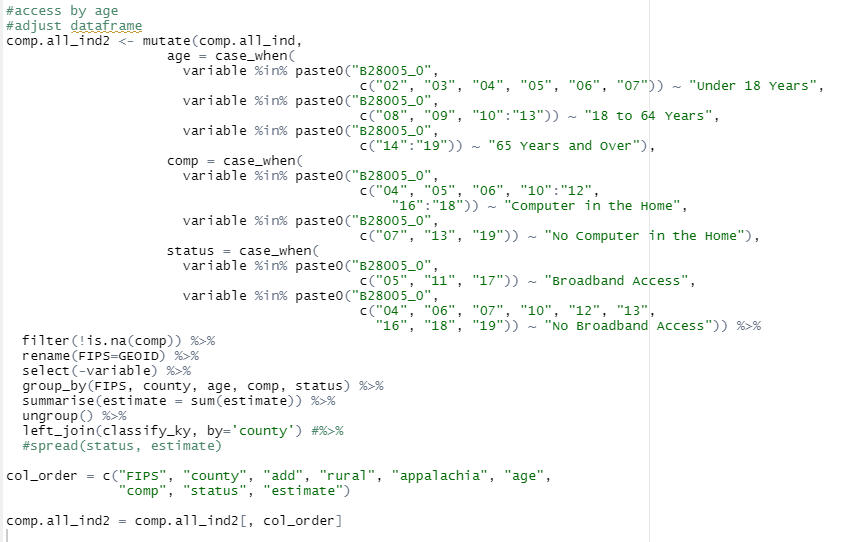

And below is the result of the transformation.

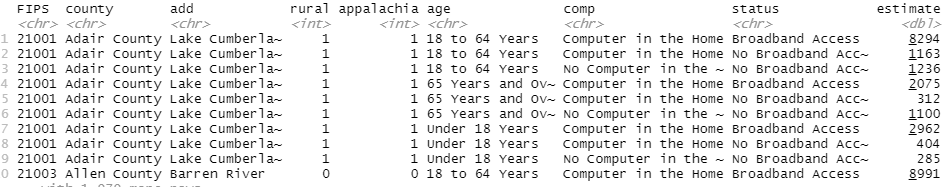

In short, the lines executed created the three variables, **`age`, `comp`, and `status`** based on the subgrouping.

To do the same within the acs module, we can utilize the **`gen_subgroups`** attribute function. This takes two main arguments with one optional argument. The main arguments are **`new_variables`** and **`groups`**. The datatype for an input for new_variables is a dictionary with the keys equal to the new variable names and with the values of another dictionary, which contains values of the new variable and the "suffix numbers" that defines this values. Then, the input for the **`new_variables`** in our case will be:

In [25]:
arg1 = {'age': {'Under 18 Years': np.arange(2, 8)    , '18 to 64 Years':  np.arange(8, 14)   , '65 Years and Over':  np.arange(14, 20)   }   , 
        'comp':  {'Computer in the Home': np.concatenate([np.arange(4, 7), np.arange(10, 13), np.arange(16, 19)]), 'No Computer in the Home': np.array([7,13,19])     }   ,
        'status':  {'Broadband Access': np.array([5, 11, 17])       , 'No Broadband Access': np.array([4,6,7,10,12, 13, 16, 18,19])   } }
acs.gen_subgroups(arg1, groups =['B28005'])

,FIPS,County,State,age,comp,status,B28005
0,21001,Adair County,Kentucky,Under 18 Years,Computer in the Home,Broadband Access,2962.0
1,21001,Adair County,Kentucky,Under 18 Years,Computer in the Home,No Broadband Access,404.0
2,21001,Adair County,Kentucky,Under 18 Years,No Computer in the Home,No Broadband Access,285.0
3,21001,Adair County,Kentucky,18 to 64 Years,Computer in the Home,Broadband Access,8294.0
4,21001,Adair County,Kentucky,18 to 64 Years,Computer in the Home,No Broadband Access,1163.0
...,...,...,...,...,...,...,...
1075,21239,Woodford County,Kentucky,18 to 64 Years,Computer in the Home,No Broadband Access,939.0
1076,21239,Woodford County,Kentucky,18 to 64 Years,No Computer in the Home,No Broadband Access,750.0
1077,21239,Woodford County,Kentucky,65 Years and Over,Computer in the Home,Broadband Access,3561.0
1078,21239,Woodford County,Kentucky,65 Years and Over,Computer in the Home,No Broadband Access,429.0


Now, let's do another example. Since other groups 'B28009A', 'B28009B' do not contain information about age, we only can create two new variables; **`comp`** and **`status`**. Since the suffix numbers are not matching between B28005 and the other, we should use gen_subgroups twice and **merge** the two tables by the **`comp`** and **`status`**. Below is the R code for B28009A

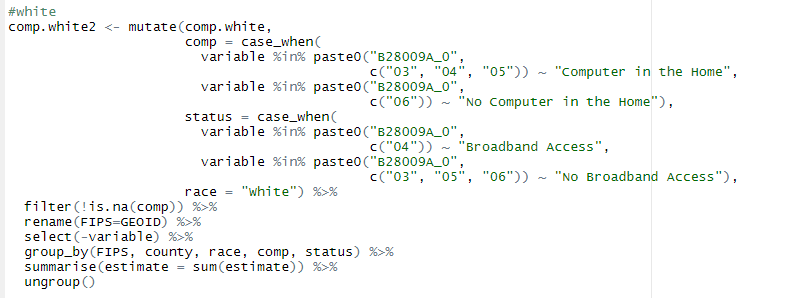

In [39]:
arg1 = {'comp':  {'Computer in the Home': np.arange(3, 6), 'No Computer in the Home': np.array([6])},
        'status':  {'Broadband Access': np.array([4]) , 'No Broadband Access': np.array([3,5,6])}}
table1 = acs.gen_subgroups(arg1, ['B28009A','B28009B','B28009H','B28009I'])
table1

,FIPS,County,State,comp,status,B28009A,B28009B,B28009H,B28009I
0,21001,Adair County,Kentucky,Computer in the Home,Broadband Access,12763.0,234.0,12554.0,261.0
1,21001,Adair County,Kentucky,Computer in the Home,No Broadband Access,1879.0,0.0,1876.0,3.0
2,21001,Adair County,Kentucky,No Computer in the Home,No Broadband Access,2400.0,221.0,2348.0,52.0
3,21003,Allen County,Kentucky,Computer in the Home,Broadband Access,14563.0,43.0,14323.0,312.0
4,21003,Allen County,Kentucky,Computer in the Home,No Broadband Access,2697.0,105.0,2640.0,57.0
...,...,...,...,...,...,...,...,...,...
355,21237,Wolfe County,Kentucky,Computer in the Home,No Broadband Access,445.0,0.0,422.0,23.0
356,21237,Wolfe County,Kentucky,No Computer in the Home,No Broadband Access,1402.0,0.0,1402.0,0.0
357,21239,Woodford County,Kentucky,Computer in the Home,Broadband Access,20972.0,628.0,19848.0,1398.0
358,21239,Woodford County,Kentucky,Computer in the Home,No Broadband Access,1581.0,208.0,1395.0,186.0


In [40]:
arg1 = {'comp':  {'Computer in the Home': np.concatenate([np.arange(4, 7), np.arange(10, 13), np.arange(16, 19)]), 'No Computer in the Home': np.array([7,13,19])     }   ,
        'status':  {'Broadband Access': np.array([5, 11, 17])       , 'No Broadband Access': np.array([4,6,7,10,12, 13, 16, 18,19])   } }
table2 = acs.gen_subgroups(arg1, groups =['B28005'])
table2

,FIPS,County,State,comp,status,B28005
0,21001,Adair County,Kentucky,Computer in the Home,Broadband Access,13331.0
1,21001,Adair County,Kentucky,Computer in the Home,No Broadband Access,1879.0
2,21001,Adair County,Kentucky,No Computer in the Home,No Broadband Access,2621.0
3,21003,Allen County,Kentucky,Computer in the Home,Broadband Access,15061.0
4,21003,Allen County,Kentucky,Computer in the Home,No Broadband Access,2802.0
...,...,...,...,...,...,...
355,21237,Wolfe County,Kentucky,Computer in the Home,No Broadband Access,445.0
356,21237,Wolfe County,Kentucky,No Computer in the Home,No Broadband Access,1437.0
357,21239,Woodford County,Kentucky,Computer in the Home,Broadband Access,22489.0
358,21239,Woodford County,Kentucky,Computer in the Home,No Broadband Access,1823.0


In [43]:
table2.merge(table1, on = list(table2.columns[:5]))

,FIPS,County,State,comp,status,B28005,B28009A,B28009B,B28009H,B28009I
0,21001,Adair County,Kentucky,Computer in the Home,Broadband Access,13331.0,12763.0,234.0,12554.0,261.0
1,21001,Adair County,Kentucky,Computer in the Home,No Broadband Access,1879.0,1879.0,0.0,1876.0,3.0
2,21001,Adair County,Kentucky,No Computer in the Home,No Broadband Access,2621.0,2400.0,221.0,2348.0,52.0
3,21003,Allen County,Kentucky,Computer in the Home,Broadband Access,15061.0,14563.0,43.0,14323.0,312.0
4,21003,Allen County,Kentucky,Computer in the Home,No Broadband Access,2802.0,2697.0,105.0,2640.0,57.0
...,...,...,...,...,...,...,...,...,...,...
355,21237,Wolfe County,Kentucky,Computer in the Home,No Broadband Access,445.0,445.0,0.0,422.0,23.0
356,21237,Wolfe County,Kentucky,No Computer in the Home,No Broadband Access,1437.0,1402.0,0.0,1402.0,0.0
357,21239,Woodford County,Kentucky,Computer in the Home,Broadband Access,22489.0,20972.0,628.0,19848.0,1398.0
358,21239,Woodford County,Kentucky,Computer in the Home,No Broadband Access,1823.0,1581.0,208.0,1395.0,186.0


## Part V. Automate periodical updates